In [12]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta



# Main source for the training data
DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
# Local file
DATA_FILE = 'data/OxCGRT_latest.csv'
#Demographics File
DEMOGRAPHICS_FILE = 'data/Country_Demographics.csv'
DEMOGRAPHICS_BRZ_R_FILE = 'data/brz_region_demo.csv'

# Load historical data from local file
df = pd.read_csv(DATA_FILE, 
                 parse_dates=['Date'],
                 encoding="ISO-8859-1",
                 dtype={"RegionName": str,
                        "RegionCode": str},
                 error_bad_lines=False)

#Data from Worldometers - https://www.worldometers.info/world-population/population-by-country/
demographics = pd.read_csv(DEMOGRAPHICS_FILE,
                 sep = ';',
                 encoding="ISO-8859-1",
                 dtype={"Country": str,
                        "Population": int},
                 error_bad_lines=False)


#variable to iterate on top for each country
country = ("Aruba,Afghanistan,Angola,Albania,Andorra,\
                United Arab Emirates,Argentina,Australia,Austria,\
                Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,\
                Bulgaria,Bahrain,Bahamas,Bosnia and Herzegovina,Belarus,\
                Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei,Bhutan,\
                Botswana,Central African Republic,Canada,Switzerland,\
                Chile,China,Cote d'Ivoire,Cameroon,Democratic Republic of Congo,\
                Congo,Colombia,Comoros,Cape Verde,Costa Rica,Cuba,Cyprus,Czech Republic,\
                Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,Ecuador,Egypt,\
                Eritrea,Spain,Estonia,Ethiopia,Finland,Fiji,France,Faeroe Islands,\
                Gabon,United Kingdom,Georgia,Ghana,Guinea,Gambia,Greece,Greenland,\
                Guatemala,Guam,Guyana,Hong Kong,Honduras,Croatia,Haiti,Hungary,Indonesia,\
                India,Ireland,Iran,Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,\
                Kenya,Kyrgyz Republic,Cambodia,South Korea,Kuwait,Laos,Lebanon,Liberia,Libya,\
                Sri Lanka,Lesotho,Lithuania,Luxembourg,Latvia,Macao,Morocco,Monaco,Moldova,\
                Madagascar,Mexico,Mali,Malta,Myanmar,Mongolia,Mozambique,Mauritania,Mauritius,\
                Malawi,Malaysia,Namibia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,\
                Oman,Pakistan,Panama,Peru,Philippines,Papua New Guinea,Poland,Puerto Rico,Portugal,\
                Paraguay,Palestine,Qatar,Kosovo,Romania,Russia,Rwanda,Saudi Arabia,Sudan,Senegal,\
                Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Somalia,Serbia,\
                South Sudan,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Seychelles,Syria,\
                Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,\
                Tunisia,Turkey,Taiwan,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,\
                Venezuela,United States Virgin Islands,Vietnam,Vanuatu,Yemen,South Africa,Zambia,Zimbabwe")

In [13]:
df.set_index('CountryName').filter(like='Italy',axis=0) 
df=demographics.join(df.set_index('CountryName'),on='Country',how='inner',lsuffix='Country',rsuffix='CountryName')
 

In [39]:
CASES_COLUMNS = ["Country", "Population", "RegionName", "Date", "ConfirmedCases", "ConfirmedDeaths"]


italy_data = df.query('Country == "Italy" \
                         & ConfirmedCases!=""\
                         & ConfirmedCases!="0"\
                         & ConfirmedCases!="NaN"')[CASES_COLUMNS]
 

### add time series
s = S/N , i = I/N, r = R/N
s+i+r = 1
I+R = ConfirmedCases + ConfirmedDeaths

In [262]:
# s = N-confirmedCases (assume population ins constant)
# need to check whether death needs to be removed
italy_data['s']=(italy_data['Population']-italy_data['ConfirmedCases'])/italy_data['Population']
#susceptible_list = italy_data['Population']-italy_data['ConfirmedCases']
#italy_data.loc[:,'Susceptible'] = pd.Series(susceptible_list, index=italy_data.index)
italy_data['NewInfected']= italy_data['ConfirmedCases'].diff()
italy_data['i'] =italy_data['ConfirmedCases']/italy_data['Population']

italy = np.zeros([italy_data.shape[0],2])
italy[0:,0] = np.arange(0,italy_data.shape[0]).astype(int)
italy[0:,1] = italy_data["i"]
print(np.min(italy[5:,1]))
np.savetxt("data/italy.csv", italy, delimiter=",")

3.307872309380798e-08


In [263]:
display(italy_data) 
len(italy_data)

,Country,Population,RegionName,Date,ConfirmedCases,ConfirmedDeaths,s,NewInfected,i
22,Italy,60461826,NaN,2020-01-31,2.0,0.0,1.000000,NaN,3.307872e-08
22,Italy,60461826,NaN,2020-02-01,2.0,0.0,1.000000,0.0,3.307872e-08
22,Italy,60461826,NaN,2020-02-02,2.0,0.0,1.000000,0.0,3.307872e-08
22,Italy,60461826,NaN,2020-02-03,2.0,0.0,1.000000,0.0,3.307872e-08
22,Italy,60461826,NaN,2020-02-04,2.0,0.0,1.000000,0.0,3.307872e-08
...,...,...,...,...,...,...,...,...,...
22,Italy,60461826,NaN,2020-12-23,1991278.0,70395.0,0.967066,13908.0,3.293447e-02
22,Italy,60461826,NaN,2020-12-24,2009317.0,70900.0,0.966767,18039.0,3.323282e-02
22,Italy,60461826,NaN,2020-12-25,2028354.0,71359.0,0.966452,19037.0,3.354768e-02
22,Italy,60461826,NaN,2020-12-26,2038759.0,71620.0,0.966280,10405.0,3.371977e-02


332

In [467]:
# import SIR, ParticleSIR classes from models.py
from models import *

#Model Parameters
num_particles = 100#50
ens = num_particles
year = '2019-20'
file = 'italy' #CDC filename
path = 'Particle_Filter'

#date = np.array(['1','2'])
#date[0] = '2020-08-01'
#date[1] = '2020-08-04'
#path = '%s_%s_predictions_example' % (date[0],date[1])

#Set parameters  
params = {} #read_params('./data/params/params2019-20.csv')
params['alpha'] =  0.015#.35 # beta
params['beta'] =  0.035 #035  # gamma
params['CDC'] = f'./data/{file}.csv'
params['filtering'] =True
params['time_varying'] =True
dat = get_data(params['CDC'])
params['epochs'] = dat.shape[0] #+ date_diff#   
params['init_i'] = dat[0]
#Created to flexibilize the amount of days


sir = ParticleSIR(num_particles, params)

initialize BaseSIR
call SIR.fit
alpha: 0.015
n epochs 332 refit True
intialize particle filter
initialize SIR
ParticleSIR initialized


332
./data/italy.csv
{'CORR': -0.32540271729034703,
 'MSPE': 0.5176217525187046,
 'RMSE': 0.010880919737495973,
 'SSE': 0.03930694555883138}


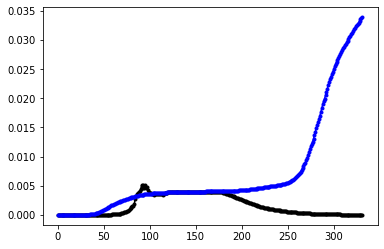

In [471]:
print(dat.shape[0])
print(params['CDC'])
sir.predict_with_filter(params)

#out_str = ','.join(map(str, sir.IS))
pprint(sir.scores)

#display(dat.shape)
#write_file(path, year, sir, out_str)

import matplotlib.pyplot as plt

x =   np.arange(0,len(sir.Is))
y = sir.IS
y_true =sir.CDC_obs

plt.plot(x,  y, '.-', color='black');

plt.plot(x,y_true, '.-',color='blue')

0.0016264682709108541
0.0071231911616151545


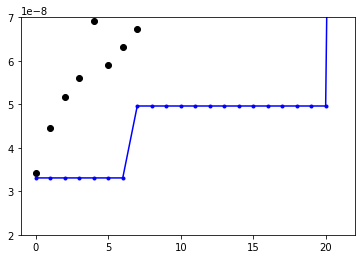

In [472]:
plt.plot(x[:22],  y[:22], 'o', color='black');
plt.plot(x[:22],y_true[:22], '.-',color='blue')
plt.ylim([0.2e-7,0.7e-7])
print(np.mean(y))
print(np.mean(y_true))

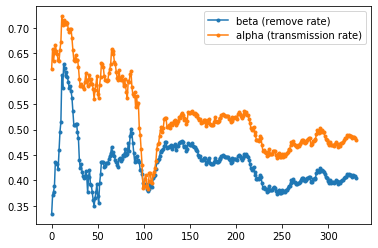

In [470]:
plt.plot(sir.beta_list,'.-',label='beta (remove rate)')
plt.plot(sir.alpha_list,'.-',label='alpha (transmission rate)')
plt.legend()

In [ ]:
sir.betas